In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
K = 1e3
r = .1
b = 1
N0 = [1, 2, 3, 10]
time_max = 100
N = np.zeros((len(N0), time_max))
N[:,0] = N0
N_linear = np.copy(N)

In [5]:
def ComputePopulation(N):
    for t in range(time_max-1):
        N[:,t+1] = (r+1)*N[:, t] / (1+(N[:, t]/K)**b)
    return N

In [6]:
def ComputeLinearStabilityPopulation():
    for t in range(time_max-1):
        N_linear[:,t+1] = (1+r) * N_linear[:,t]
    return N_linear

In [7]:
N = ComputePopulation(N)
N_linear = ComputeLinearStabilityPopulation()

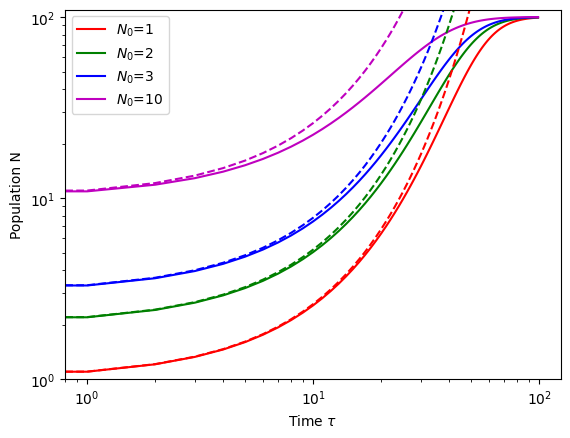

In [8]:
color = ['r','g','b','m']
for i, row in enumerate(N):
    plt.loglog(row,c=color[i],label= f'$N_0$={N0[i]}')

for i, row in enumerate(N_linear):
    plt.loglog(row, linestyle = '--',  c=color[i])

plt.xlabel(r"Time $\tau$")
plt.ylabel("Population N")
plt.ylim(1,110)
plt.legend()
plt.show()

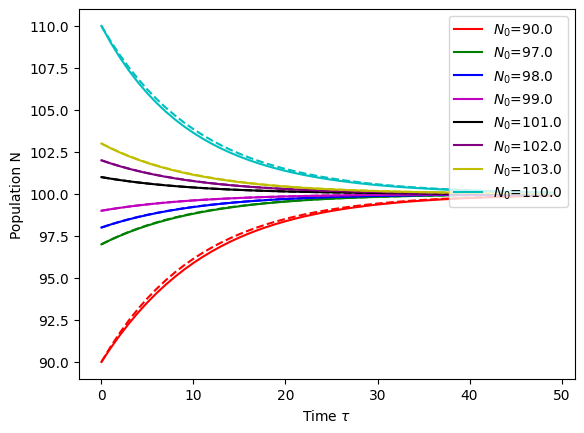

In [72]:
# f)
time_max = 50
N_star_2= K*r**(1/b)
N = np.zeros((len(N0), time_max))
dN0 = np.array([-10, -3, -2, -1, 1, 2, 3, 10])
N_linear = np.copy(N)

N[:,0] = N_star_2 + dN0
N_linear[:,0] = dN0


for t in range(time_max - 1):
        N_linear[:, t + 1] = (1+r-r*b)/(1+r) * N_linear[:, t]
        N[:,t+1] = (r+1)*N[:, t] / (1+(N[:, t]/K)**b)
N_linear += 100

colors = ['r','g','b','m','k','purple','y','c']
for i, color in enumerate(colors):
    plt.plot(range(time_max), N[i,:],c=color, label= f'$N_0$={N[i,0]}')
    plt.plot(range(time_max), N_linear[i,:],'--', c=color)

plt.legend(loc='upper right')
plt.xlabel(r"Time $\tau$")
plt.ylabel("Population N")
plt.show()

In [ ]:
for t in range(time_max - 1):
    N[:, t + 1] = (r + 1) * N[:, t] / (1 + (N[:, t] / K) ** b)

for t in range(time_max - 1):
        N_linear[:, t + 1] = (1 + r) * N_linear[:, t]


N = np.zeros((len(N0), time_max))
N[:,0] = N0
N = ComputePopulation(N)

tau = np.arange(0,time_max)
data = np.full((len(dN0), len(tau)), 1-b*r/(1+r))**tau
data = data[:,:] * N[:, None]
color = ['r','g','b','m']
for i, row in enumerate(N):
    plt.loglog(row,c=color[i],label= f'$N_0$={N0[i]}')

for i, row in enumerate(N_linear):
    plt.loglog(row, linestyle = '--',  c=color[i])

plt.xlabel(r"Time $\tau$")
plt.ylabel("Population N")
plt.ylim(1,110)
plt.legend()
plt.show()